The aim here is to build a model which can predict the weight for the given height and gender.

In [1]:
#Read the data file which is in csv format.
wthtdf = read.csv('../input/weight-height/weight-height.csv')
summary(wthtdf)
dim(wthtdf)

    Gender         Height          Weight     
 Female:5000   Min.   :54.26   Min.   : 64.7  
 Male  :5000   1st Qu.:63.51   1st Qu.:135.8  
               Median :66.32   Median :161.2  
               Mean   :66.37   Mean   :161.4  
               3rd Qu.:69.17   3rd Qu.:187.2  
               Max.   :79.00   Max.   :270.0  

[1] 10000     3

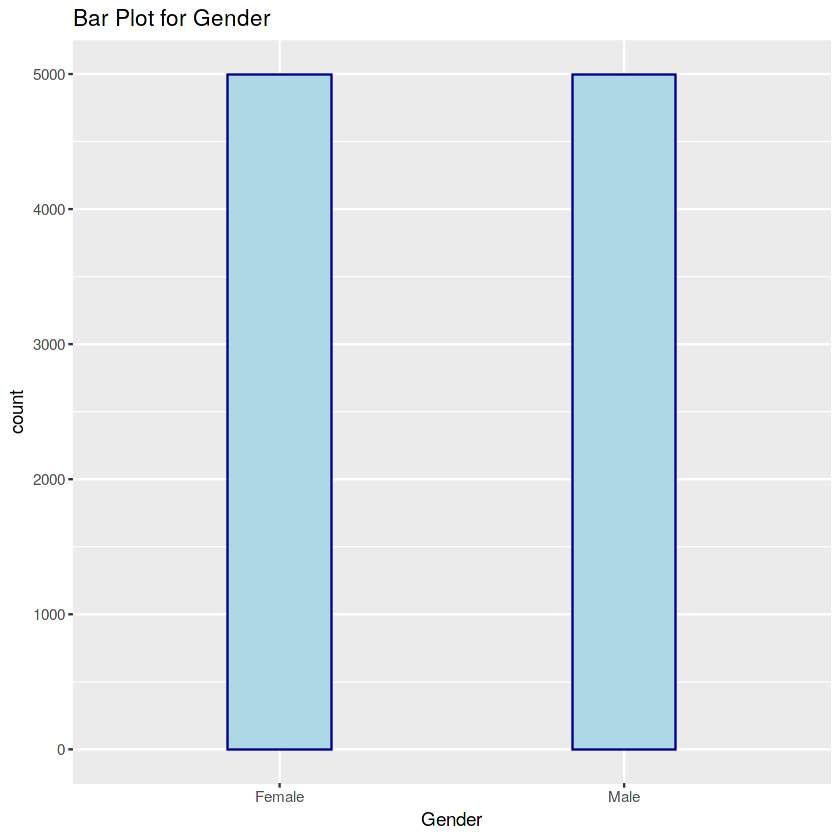

In [2]:
#Visualise the the data
library(ggplot2)

p <- ggplot(data=wthtdf, aes(Gender))+
    geom_bar(stat = 'count',color = "darkblue",fill = "lightblue", width = 0.3)
p + labs(title = "Bar Plot for Gender")

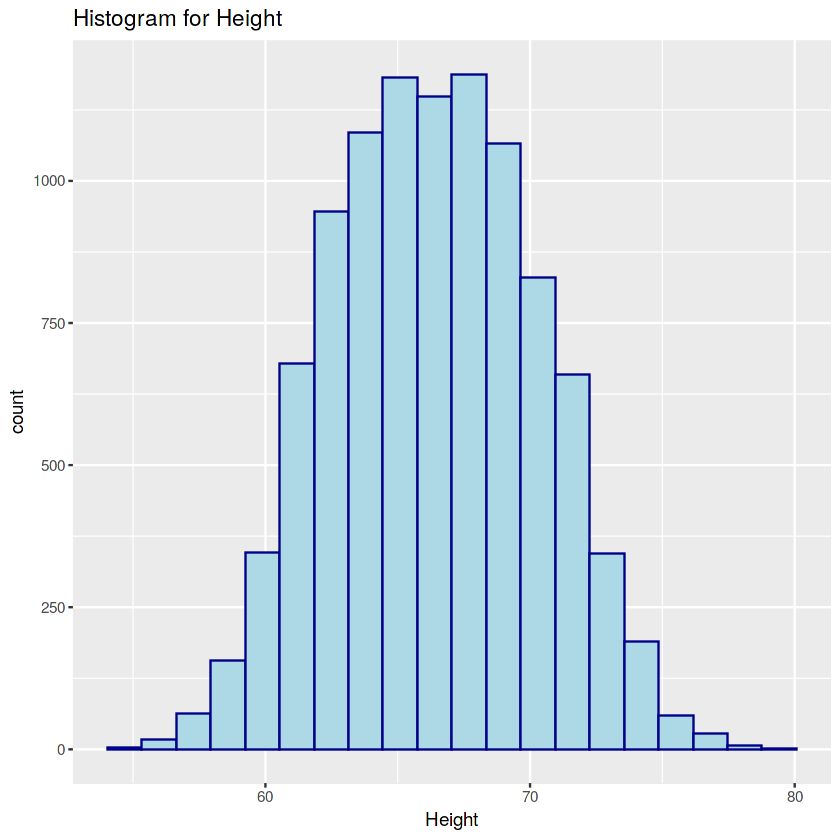

In [3]:
p <- ggplot(data=wthtdf, aes(x = Height))+
    geom_histogram(color = "darkblue",fill = "lightblue", bins = 20)
p + labs(title = "Histogram for Height")

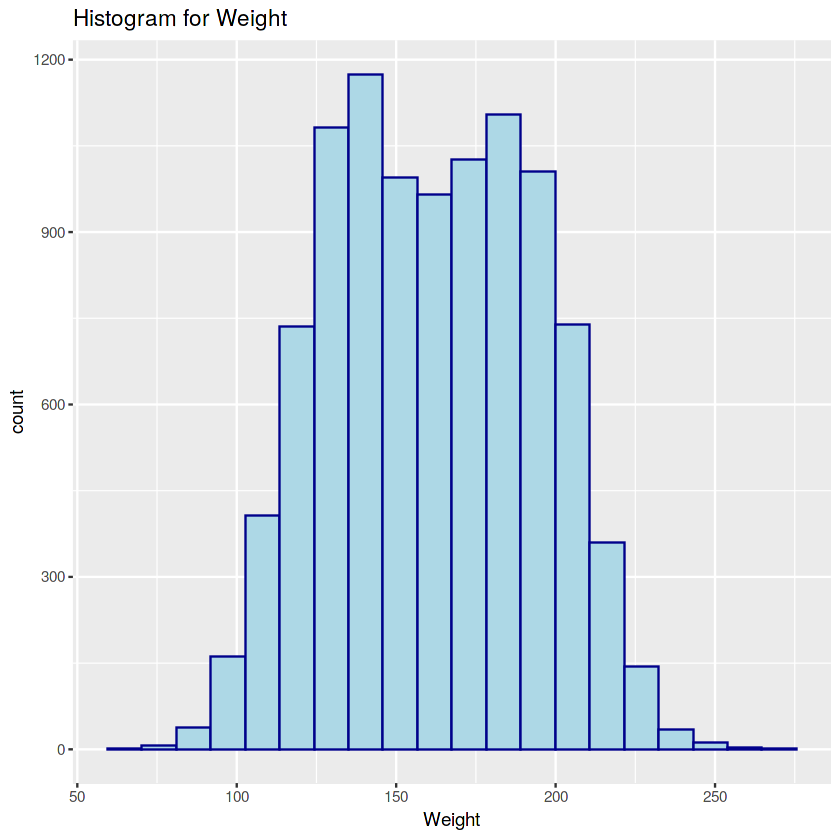

In [4]:
p <- ggplot(data=wthtdf, aes(x = Weight))+
    geom_histogram(color = "darkblue",fill = "lightblue", bins = 20)
p + labs(title = "Histogram for Weight")

In [5]:
# Check the correlation
cor(wthtdf[,-1])

,Height,Weight
Height,1.0000000,0.9247563
Weight,0.9247563,1.0000000


In [6]:
#split the data into train and test data
set.seed(456)  # for reproducibility
sindex = sample(1:nrow(wthtdf), size = 0.75*nrow(wthtdf),replace = FALSE)
traindf = wthtdf[sindex,]
testdf = wthtdf[-sindex,]
dim(traindf)

[1] 7500    3

In [7]:
#create the MLR model using the train data
Model1 = lm(Weight~.,data = traindf)
summary(Model1)


Call:
lm(formula = Weight ~ ., data = traindf)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.185  -6.736  -0.117   6.808  33.029 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -245.77310    2.64572  -92.89   <2e-16 ***
GenderMale    19.25556    0.31990   60.19   <2e-16 ***
Height         5.99024    0.04147  144.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.991 on 7497 degrees of freedom
Multiple R-squared:  0.9035,	Adjusted R-squared:  0.9035 
F-statistic: 3.511e+04 on 2 and 7497 DF,  p-value: < 2.2e-16


In [8]:
#Test the model on Test data
testdf$predwt = predict(Model1, newdata = testdf)
head(testdf)

,Gender,Height,Weight,predwt
,<fct>,<dbl>,<dbl>,<dbl>
4,Male,71.73098,220.0425,203.1679
8,Male,68.34852,167.9711,182.9062
11,Male,71.19538,186.6049,199.9596
13,Male,64.76633,167.1275,161.4480
16,Male,67.64562,172.1869,178.6957
18,Male,63.97433,172.8835,156.7037


In [9]:
#Mean absolute error
mean(abs(testdf$Weight-testdf$predwt))


[1] 8.098652